### Reynor-Teo Strategy
---

1. Buy when S&P 500 > 200 day MA
1. Entry: 10 period RSI < 30 (buy on next day's open)
1. Entry: 10 period RSI > 40 or after 10 trading days (sell on next day's open)

In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

%matplotlib inline

In [3]:
sp500 = yf.download("^GSPC", start="1996-01-01", end="2022-05-01")

[*********************100%***********************]  1 of 1 completed


In [4]:
sp500

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-02,615.929993,620.739990,613.169983,620.729980,620.729980,364180000
1996-01-03,620.729980,623.250000,619.559998,621.320007,621.320007,468950000
1996-01-04,621.320007,624.489990,613.960022,617.700012,617.700012,512580000
1996-01-05,617.700012,617.700012,612.020020,616.710022,616.710022,437110000
1996-01-08,616.710022,618.460022,616.489990,618.460022,618.460022,130360000
...,...,...,...,...,...,...
2022-04-25,4255.339844,4299.020020,4200.819824,4296.120117,4296.120117,4061070000
2022-04-26,4278.140137,4278.140137,4175.040039,4175.200195,4175.200195,3760420000
2022-04-27,4186.520020,4240.709961,4162.899902,4183.959961,4183.959961,3876340000


In [5]:
# Calculate the 200 day moving average
sp500['MA_200'] = sp500['Adj Close'].rolling(window=200).mean()
sp500

,Open,High,Low,Close,Adj Close,Volume,MA_200
Date,,,,,,,
1996-01-02,615.929993,620.739990,613.169983,620.729980,620.729980,364180000,NaN
1996-01-03,620.729980,623.250000,619.559998,621.320007,621.320007,468950000,NaN
1996-01-04,621.320007,624.489990,613.960022,617.700012,617.700012,512580000,NaN
1996-01-05,617.700012,617.700012,612.020020,616.710022,616.710022,437110000,NaN
1996-01-08,616.710022,618.460022,616.489990,618.460022,618.460022,130360000,NaN
...,...,...,...,...,...,...,...
2022-04-25,4255.339844,4299.020020,4200.819824,4296.120117,4296.120117,4061070000,4496.293240
2022-04-26,4278.140137,4278.140137,4175.040039,4175.200195,4175.200195,3760420000,4495.246091
2022-04-27,4186.520020,4240.709961,4162.899902,4183.959961,4183.959961,3876340000,4494.319841


In [6]:
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Adj Close,Volume,MA_200
Date,,,,,,,
1996-10-14,700.659973,705.159973,700.659973,703.539978,703.539978,322000000,654.137300
1996-10-15,703.539978,708.070007,699.070007,702.570007,702.570007,458980000,654.546501
1996-10-16,702.570007,704.419983,699.150024,704.409973,704.409973,441410000,654.961950
1996-10-17,705.000000,708.520020,704.760010,706.989990,706.989990,478550000,655.408400
1996-10-18,706.989990,711.039978,706.109985,710.820007,710.820007,473020000,655.878950
...,...,...,...,...,...,...,...
2022-04-25,4255.339844,4299.020020,4200.819824,4296.120117,4296.120117,4061070000,4496.293240
2022-04-26,4278.140137,4278.140137,4175.040039,4175.200195,4175.200195,3760420000,4495.246091
2022-04-27,4186.520020,4240.709961,4162.899902,4183.959961,4183.959961,3876340000,4494.319841


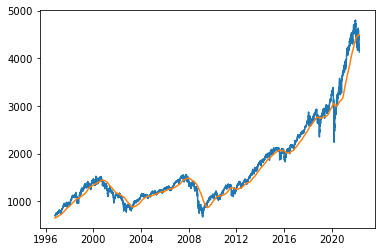

In [9]:
plt.plot(sp500['Adj Close'])
plt.plot(sp500['MA_200'])
plt.show()

Condition 1: Buy if Price > 200 day MA

In [13]:
# Get the daily returns
sp500['price_change'] = sp500['Adj Close'].pct_change()
sp500 = sp500.dropna()
sp500

,Open,High,Low,Close,Adj Close,Volume,MA_200,price_change
Date,,,,,,,,
1996-10-15,703.539978,708.070007,699.070007,702.570007,702.570007,458980000,654.546501,-0.001379
1996-10-16,702.570007,704.419983,699.150024,704.409973,704.409973,441410000,654.961950,0.002619
1996-10-17,705.000000,708.520020,704.760010,706.989990,706.989990,478550000,655.408400,0.003663
1996-10-18,706.989990,711.039978,706.109985,710.820007,710.820007,473020000,655.878950,0.005417
1996-10-21,710.820007,714.099976,707.710022,709.849976,709.849976,414630000,656.335900,-0.001365
...,...,...,...,...,...,...,...,...
2022-04-25,4255.339844,4299.020020,4200.819824,4296.120117,4296.120117,4061070000,4496.293240,0.005698
2022-04-26,4278.140137,4278.140137,4175.040039,4175.200195,4175.200195,3760420000,4495.246091,-0.028146
2022-04-27,4186.520020,4240.709961,4162.899902,4183.959961,4183.959961,3876340000,4494.319841,0.002098


#### RSI Calculation
---